# Your task is to develop a model that predicts whether a biopsied breast cell is benign (not harmful) or malignant (cancerous), given a set of attributes about the cell. 

The dataset description:

<img src="data_descrip.png">

First read in the data!

In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Attribute Information:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

In [59]:
data = pd.read_csv('/Users/blevins/Desktop/data_challenge_1/data.csv',sep=',', names=['id_number','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','diagnosis'])

In [60]:
data

,id_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [61]:
data.describe()

,id_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1071704.098712,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,617095.729819,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,61634.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,870688.500000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1171710.000000,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1238298.000000,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,13454352.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


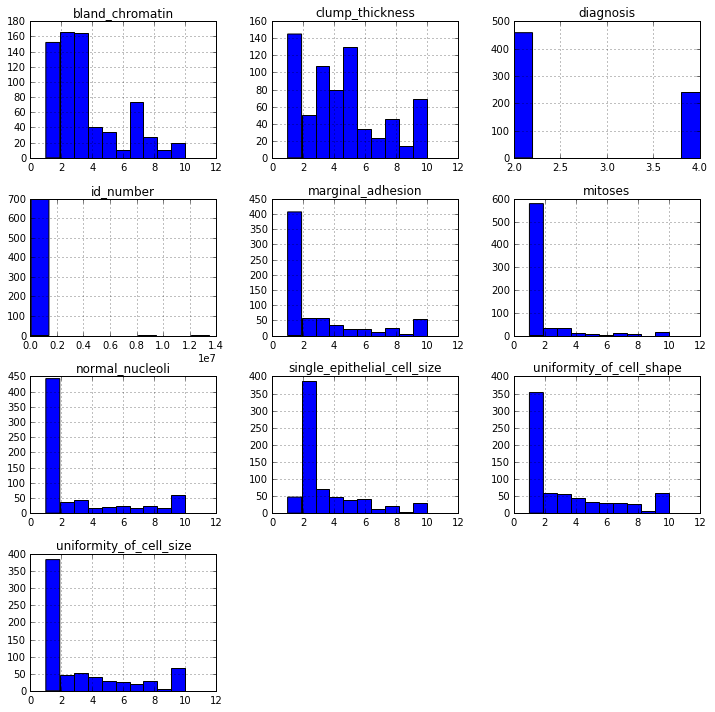

In [62]:
data.hist(figsize=(12,12))
plt.show()

Okay! I'll set up the data structure to apply a logistic regression - a great starting point, treating this as a binary classification problem! I have the observables, y, in column 11, called 'class'. I'll explore all the attributes and use them to define the feature space X.

In [180]:
data.columns

# Let malignant tumor = 1, and benign tumor = 0
# opposed to Class: (2 for benign, 4 for malignant)
bi1 = data.diagnosis.replace(4,1)
bi2 = bi1.replace(2,0)


In [183]:
data.columns
new_df = pd.DataFrame({'id_number':data.id_number, 'clump_thickness':data.clump_thickness, 'uniformity_of_cell_size':data.uniformity_of_cell_size,
       'uniformity_of_cell_shape':data.uniformity_of_cell_shape, 'marginal_adhesion':data.marginal_adhesion,
       'single_epithelial_cell_size':data.single_epithelial_cell_size, 'bare_nuclei':data.bare_nuclei, 'bland_chromatin':data.bland_chromatin,
       'normal_nucleoli':data.normal_nucleoli, 'mitoses':data.mitoses, 'diagnosis':bi2})
new_df

,bare_nuclei,bland_chromatin,clump_thickness,diagnosis,id_number,marginal_adhesion,mitoses,normal_nucleoli,single_epithelial_cell_size,uniformity_of_cell_shape,uniformity_of_cell_size
0,1,3,5,0,1000025,1,1,1,2,1,1
1,10,3,5,0,1002945,5,1,2,7,4,4
2,2,3,3,0,1015425,1,1,1,2,1,1
3,4,3,6,0,1016277,1,1,7,3,8,8
4,1,3,4,0,1017023,3,1,1,2,1,1
5,10,9,8,1,1017122,8,1,7,7,10,10
6,10,3,1,0,1018099,1,1,1,2,1,1
7,1,3,2,0,1018561,1,1,1,2,2,1
8,1,1,2,0,1033078,1,5,1,2,1,1
9,1,2,4,0,1033078,1,1,1,2,1,2


First I can relabel my '?' with data.fillna('NaN') but that will lead to the same problem, or I can try and drop them using data.dropna()

In [184]:

clean_data = new_df.replace('?', np.nan)
clean_data = clean_data.dropna()
clean_data
len(clean_data)

683

I will isolate the observable data - column 11 - malignant=4, benign=2:

In [185]:
# Isolate target data data.diagnosis, Y
# and build my feature space, X
diagnosis_result = clean_data.diagnosis
y = diagnosis_result.astype(int)

to_drop = ['diagnosis']
to_drop
all_feat_space = clean_data.drop(to_drop,axis=1)
all_feat_space

X = all_feat_space.as_matrix().astype(np.float)

In [186]:
# This is important
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print "Feature space holds %d observations and %d features" % X.shape
print "Unique target labels:", np.unique(y)

Feature space holds 683 observations and 10 features
Unique target labels: [0 1]


In [187]:
from sklearn import linear_model, datasets

logreg = linear_model.LogisticRegression(C=1e5)

model = logreg.fit(X, y)


model
model.coef_



array([[ 1.39807053,  1.09660054,  1.50852291,  0.02423388,  0.94718244,
         0.92515523,  0.65170058,  0.21420384,  0.95918055, -0.01745218]])

Split the dataset into training and test sets - 70/30


In [188]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [189]:
len(X_train), len(y_train)

(478, 478)

In [190]:
len(X_test), len(y_test)

(205, 205)

In [200]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
  
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)
model.score(X_test, y_test)

accuracy_score = metrics.accuracy_score(y_test, predicted)
roc_auc_score = metrics.roc_auc_score(y_test, probs[:, 1])
precision_score = metrics.precision_score(y_test, predicted)
recall_score = metrics.recall_score(y_test, predicted)



In [201]:
print "Accuracy score = "+str(accuracy_score)

print "AUC score = "+str(roc_auc_score)

print "Precision score = "+str(precision_score)

print "Recall score = "+str(recall_score)

Accuracy score = 0.956097560976
AUC score = 0.996365838886
Precision score = 0.972602739726
Recall score = 0.910256410256


Trying a TSNE model: "t-distributed Stochastic Neighbor Embedding.

t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high. This will suppress some noise and speed up the computation of pairwise distances between samples. For more tips see Laurens van der Maaten’s FAQ [2]."

In [202]:
tsne_model = manifold.TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
SNE = tsne_model.fit_transform(X) 

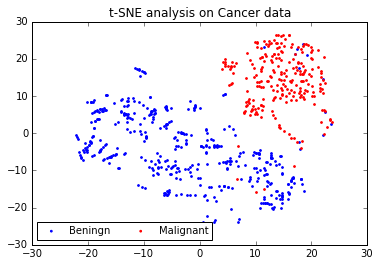

In [203]:
labels = ['Beningn','Malignant']
colors = ['b', 'r']

a = plt.scatter(SNE[np.where(y == 0)[0],0], SNE[np.where(y == 0)[0],1], 3, color=colors[0])
b = plt.scatter(SNE[np.where(y == 1)[0],0], SNE[np.where(y == 1)[0],1], 3, color=colors[1])

plt.legend((a,b),tuple(labels),scatterpoints=1,
  loc='lower left',ncol=3, fontsize=10)
plt.title('t-SNE analysis on Cancer data')

#plt.savefig('t-SNE_Cancer.png',dpi=1200)
plt.show()

In [204]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train) 
neigh.score(X_train, y_train)
#print(neigh.predict([[1.1]]))

0.96025104602510458